In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer


In [33]:
# Loading the CSV file
data = pd.read_csv('Liver_disease_data.csv')

In [34]:
# Storing data from the CSV to a PostgreSQL database
from sqlalchemy import create_engine

username = 'dhruvnaruka'
password = 'password'
host = 'localhost'
port = '5432'
database = 'liverdisease'

db_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'

engine = create_engine(db_url)

table_name = 'liver_table'

data.to_sql(table_name, engine, if_exists='replace', index=False)

700

In [77]:
# Exploratory Data Analysis
target = "Diagnosis"

# checking to see if there are any missing values
missing_values = data.isnull().sum()
print(missing_values)

missing_values = missing_values[missing_values > 0]
print(missing_values)

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64
Series([], dtype: int64)


In [36]:
# Exploring each categorical variable
cols = ["Gender", "Smoking", "GeneticRisk", "Diabetes", "Hypertension", "Diagnosis"]
for col in cols:
    print(data[col].value_counts(), "\n")

Gender
1    857
0    843
Name: count, dtype: int64 

Smoking
0    1204
1     496
Name: count, dtype: int64 

GeneticRisk
0    978
1    557
2    165
Name: count, dtype: int64 

Diabetes
0    1458
1     242
Name: count, dtype: int64 

Hypertension
0    1437
1     263
Name: count, dtype: int64 

Diagnosis
1    936
0    764
Name: count, dtype: int64 



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


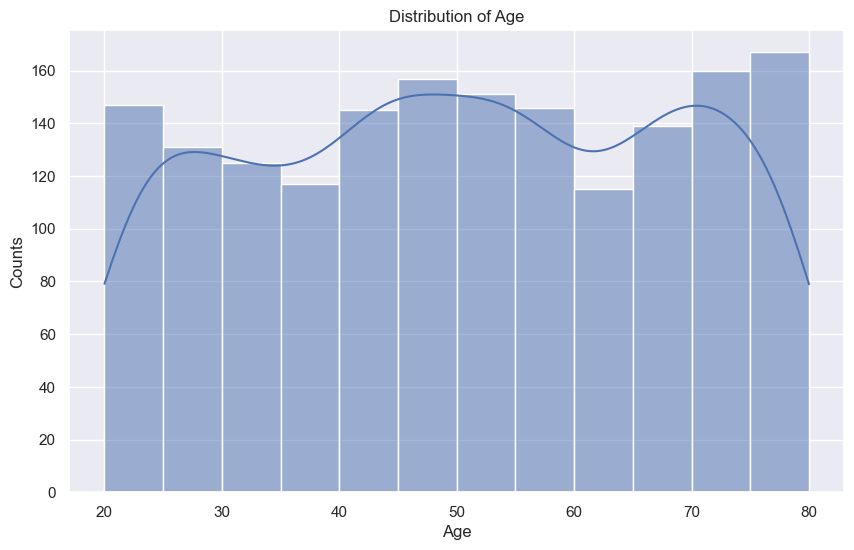

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


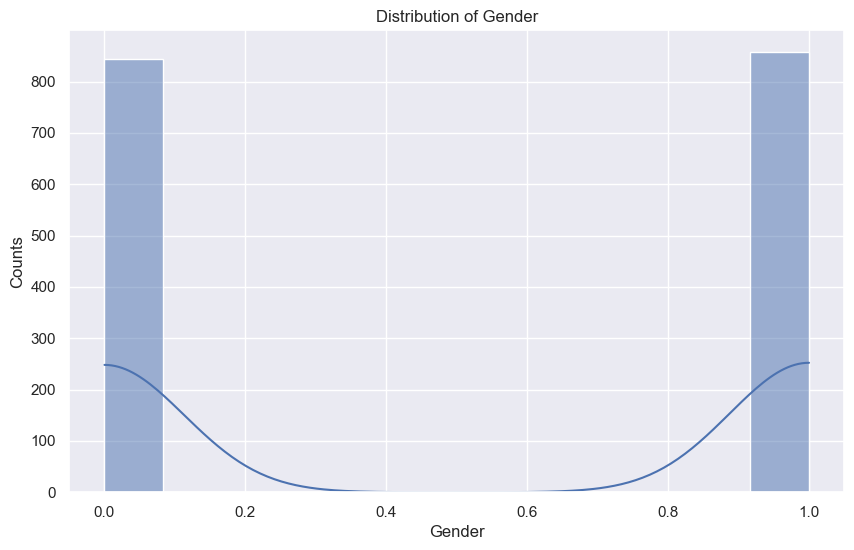

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


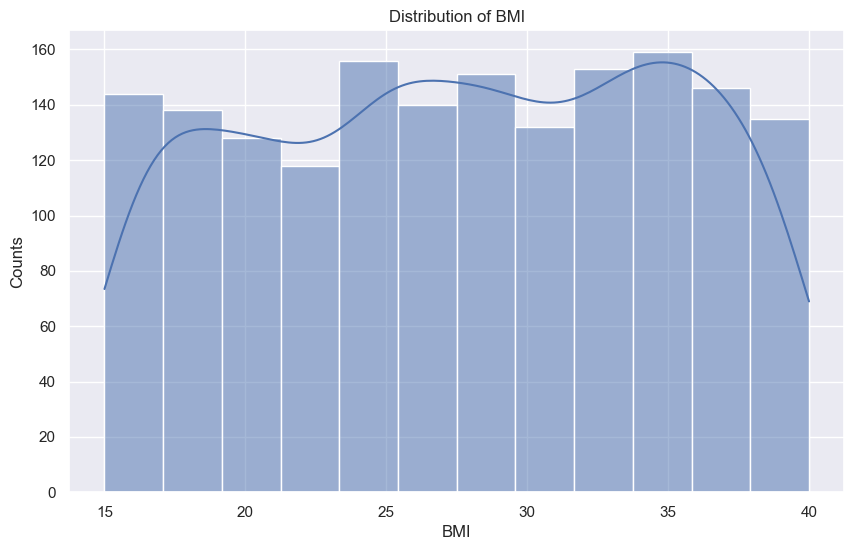

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


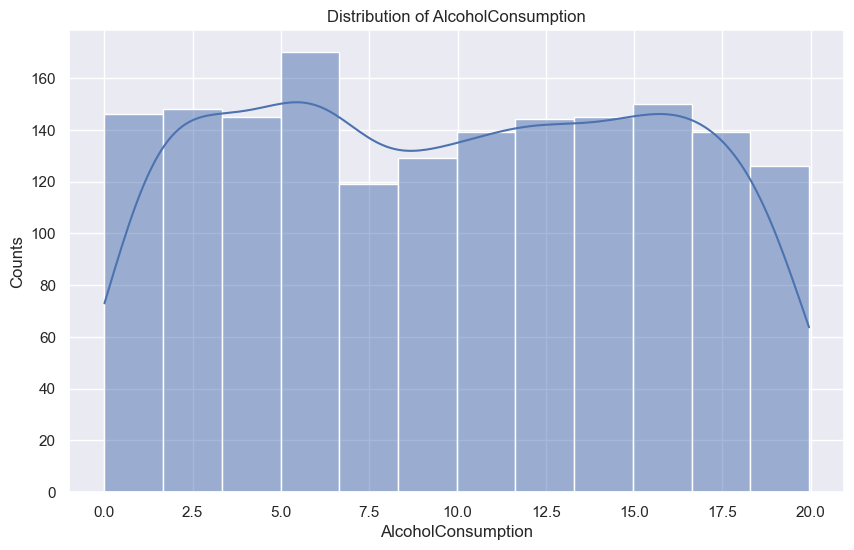

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


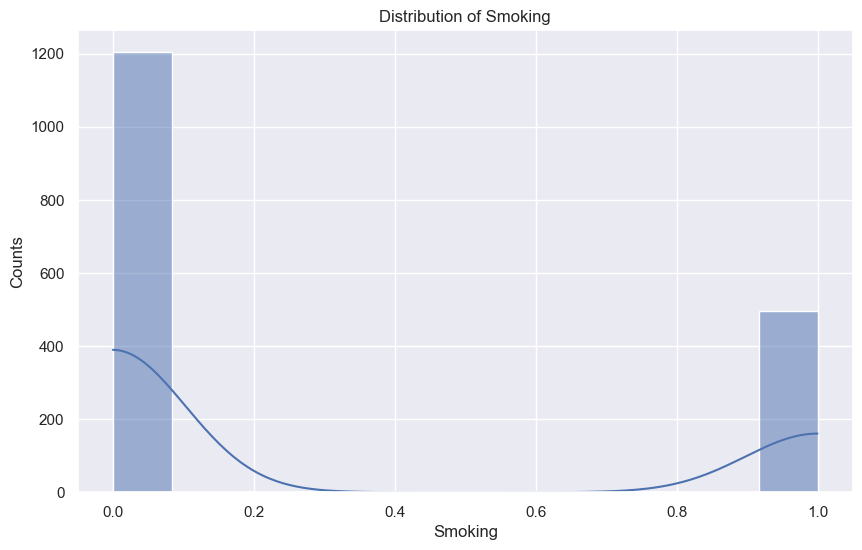

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


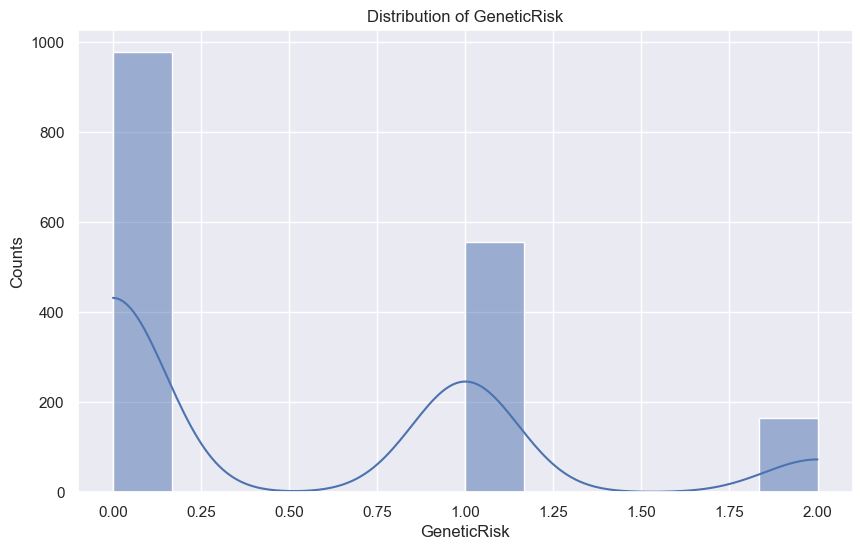

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


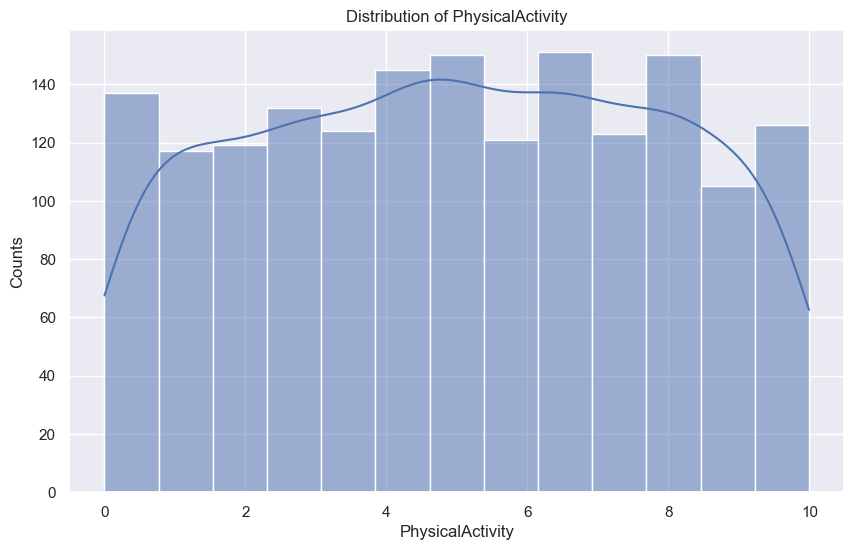

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


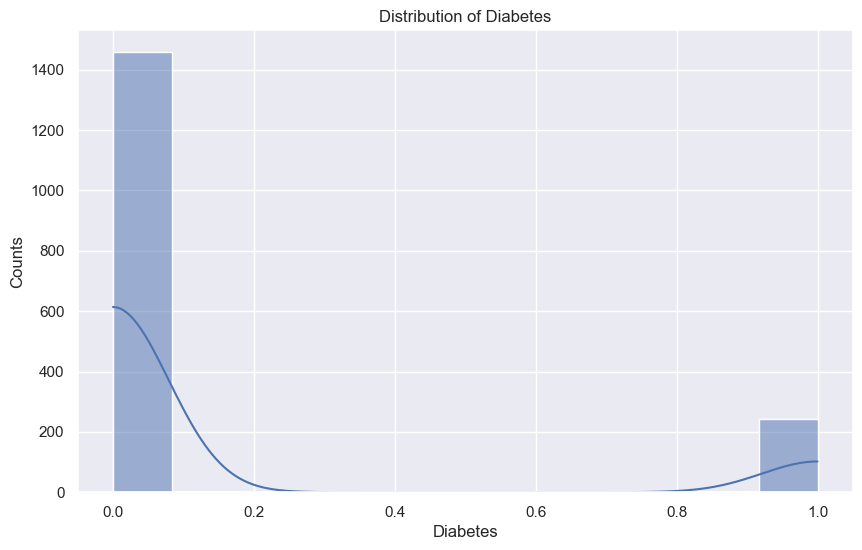

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


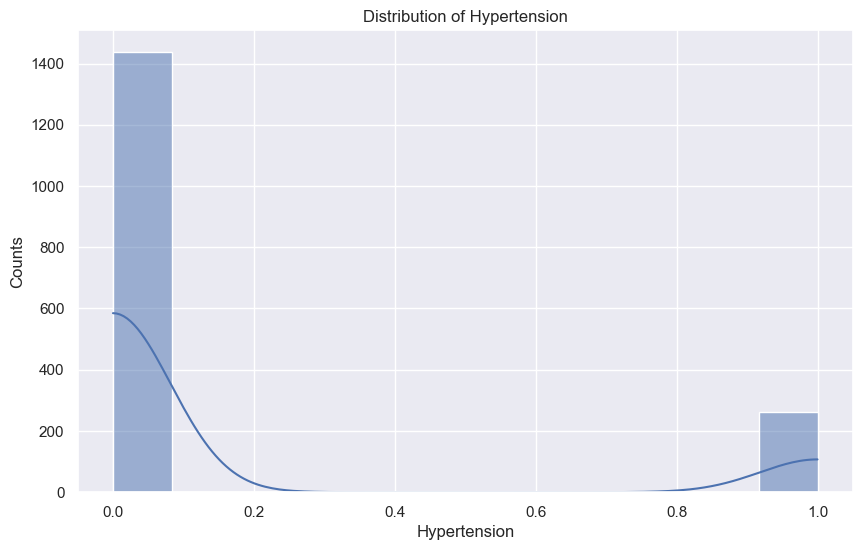

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


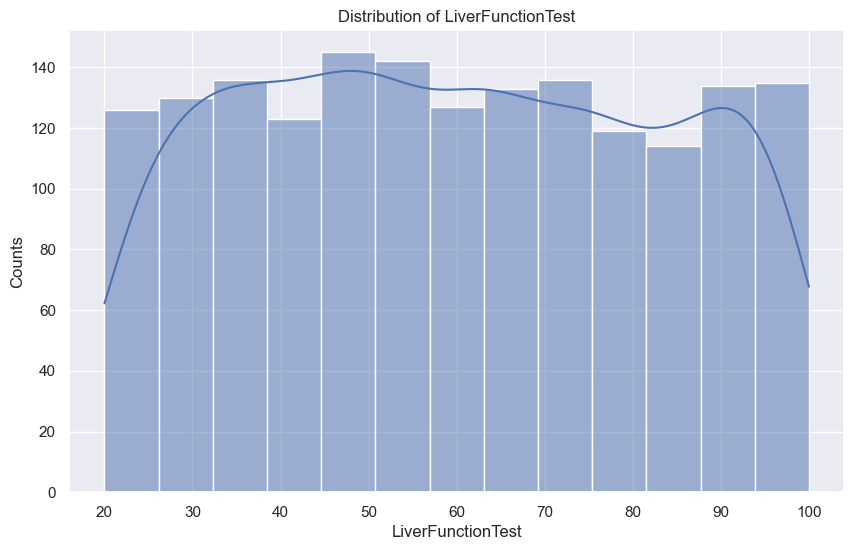

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


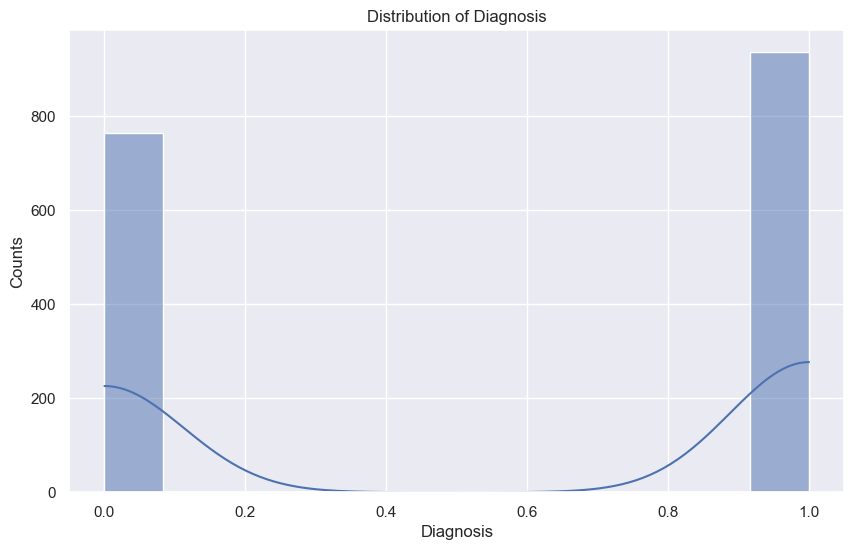

In [37]:
# Distribution graphs for each variable
sns.set(style="darkgrid")

def plot_distributions(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(10, 6))
        
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            sns.histplot(dataframe[column], kde=True)
            plt.title(f'Distribution of {column}')
        else:
            sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index)
            plt.title(f'Count plot of {column}')
        
        plt.xlabel(column)
        plt.ylabel('Counts')
        
        plt.show()

plot_distributions(data)

In [38]:
# simple linear regression model using all features
X = data[['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'Diabetes', 'Hypertension']]
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

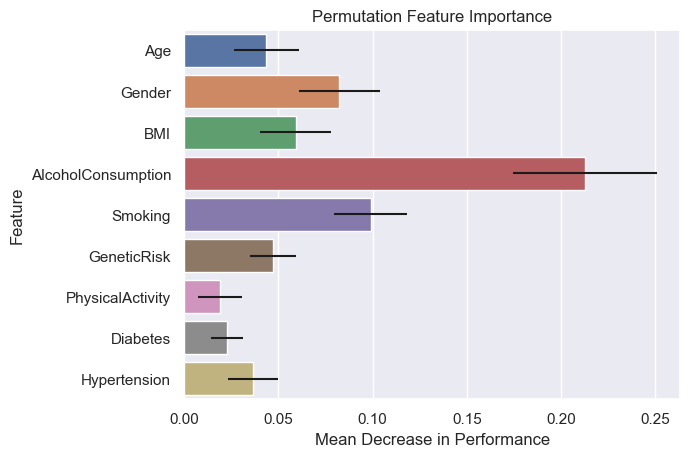

In [39]:
# using the simple linear regression model to find which features are most important in predicting the target
# used permuation importance
result = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=42)
feature_importance = pd.DataFrame({'feature': X.columns, 
                                   'importance_mean': result.importances_mean, 
                                   'importance_std': result.importances_std})
sns.barplot(x='importance_mean', y='feature', xerr=feature_importance['importance_std'], data=feature_importance)
plt.title('Permutation Feature Importance')
plt.xlabel('Mean Decrease in Performance')
plt.ylabel('Feature')
plt.show()

# the plot shows that alcohol consumption is the most important variable in predicting the target variable, followed by smoking and gender

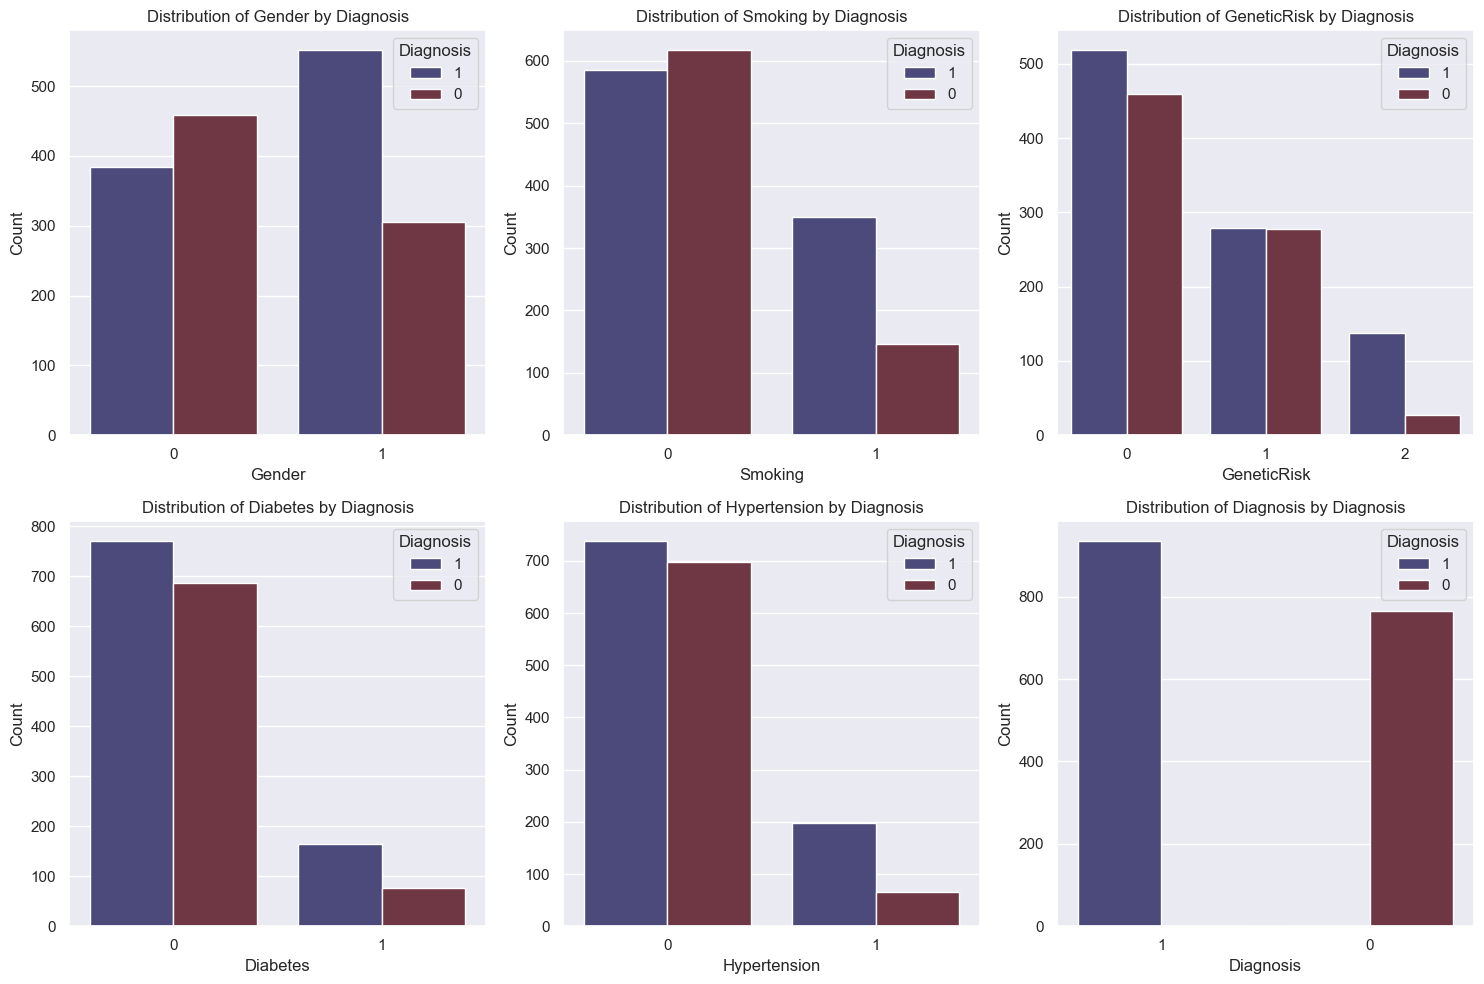

In [40]:
# bivariate plots for the categorical variables
def plot_categorical_bivariate(df, cols, target):
    df[target] = df[target].astype(str)

    n_cols = 3
    n_rows = math.ceil(len(cols) / n_cols)

    plt.figure(figsize=(15, 5 * n_rows))

    for index, category in enumerate(cols):
        plt.subplot(n_rows, n_cols, index + 1)
        
        sns.countplot(data=df, x=category, hue=target, palette='icefire')
        
        plt.title(f"Distribution of {category} by {target}")
        plt.xlabel(category)
        plt.ylabel("Count")
        plt.legend(title=target)

    plt.tight_layout()
    plt.show()

plot_categorical_bivariate(data, cols, target)

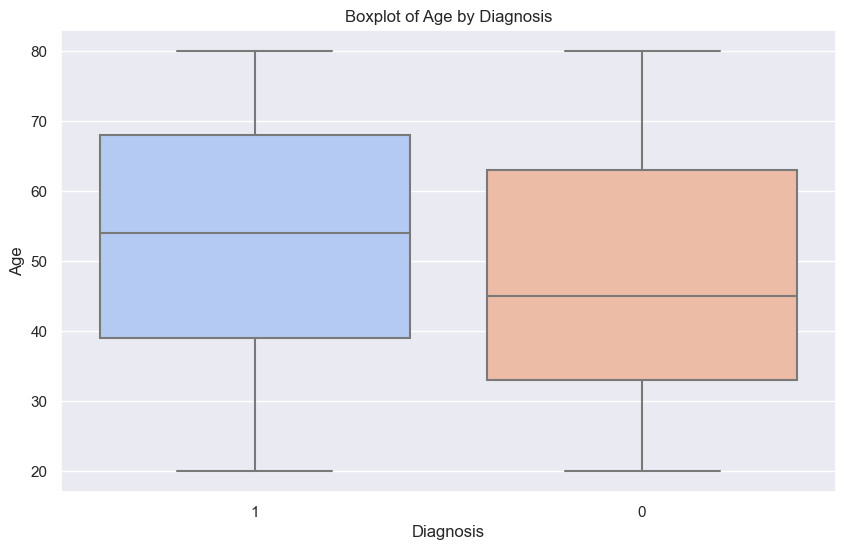

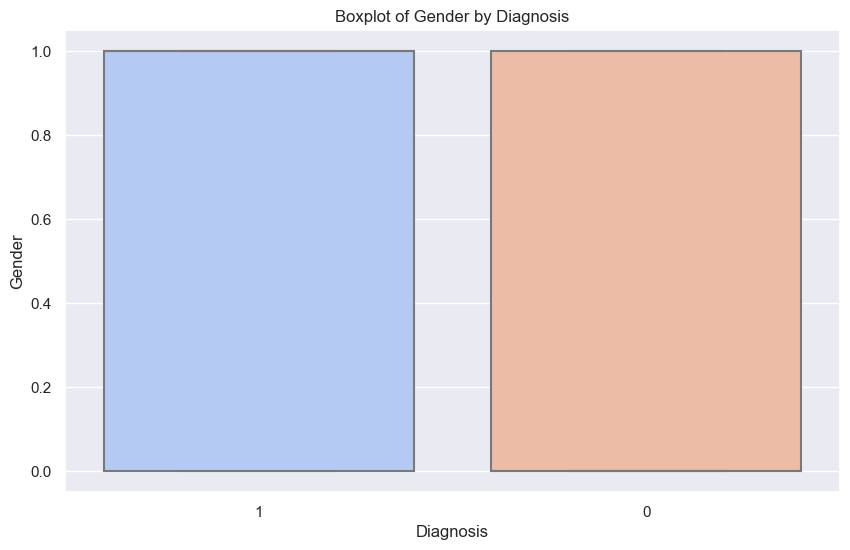

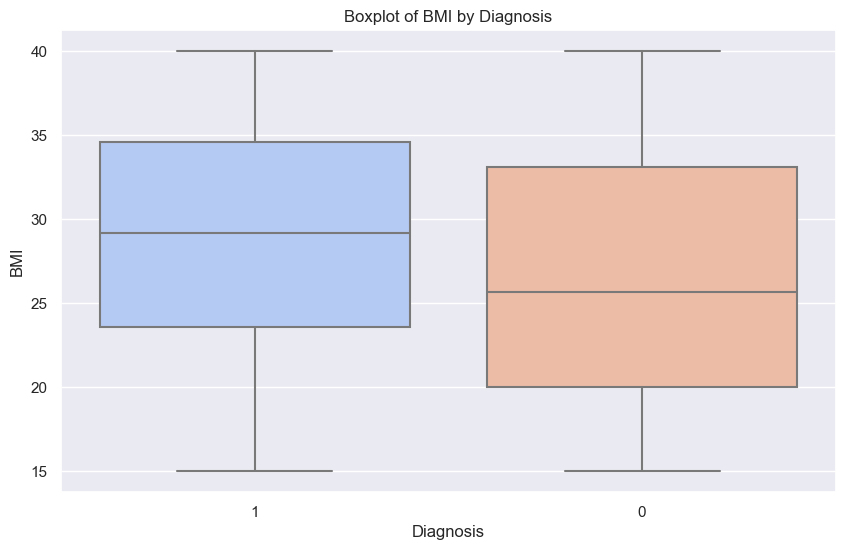

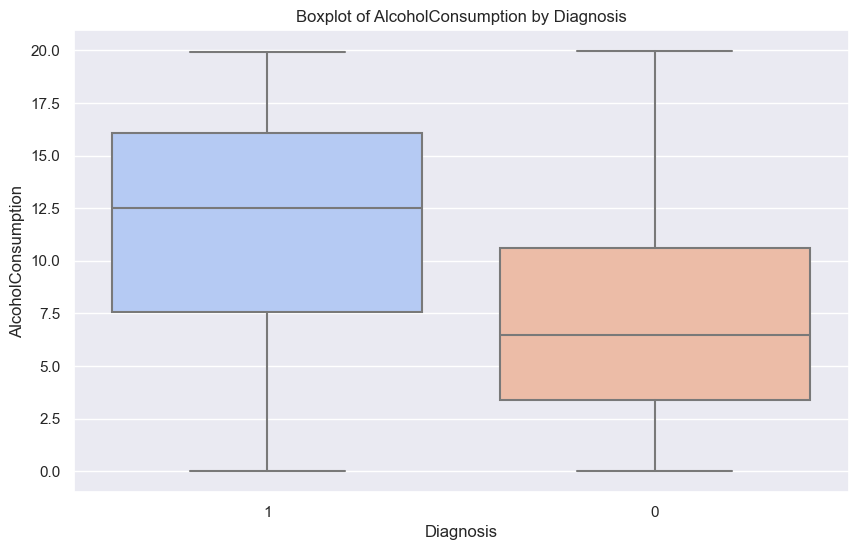

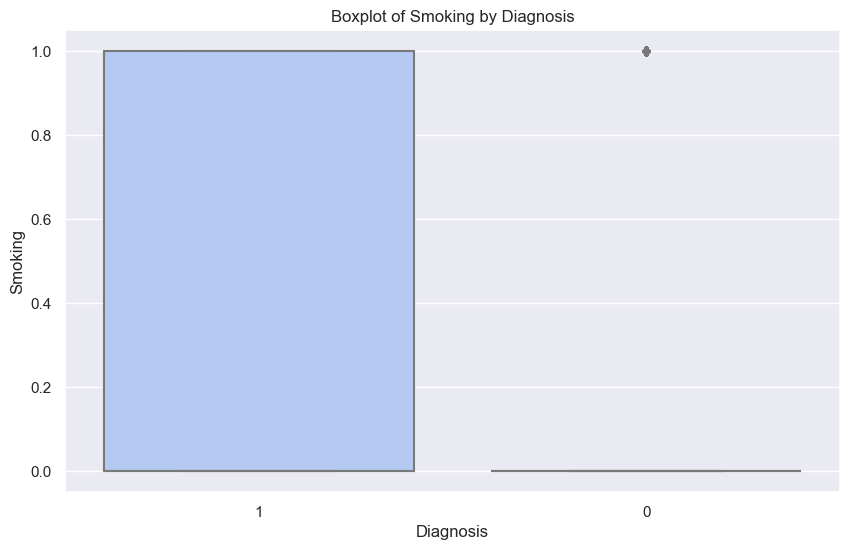

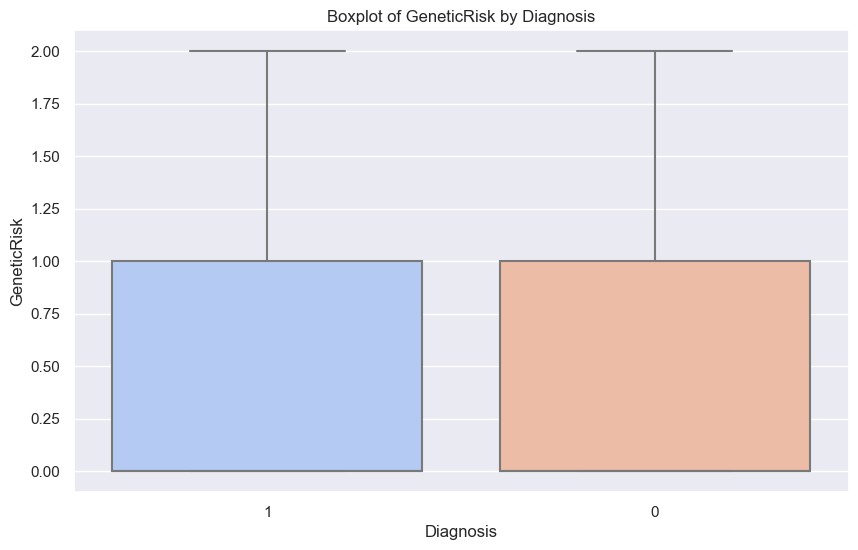

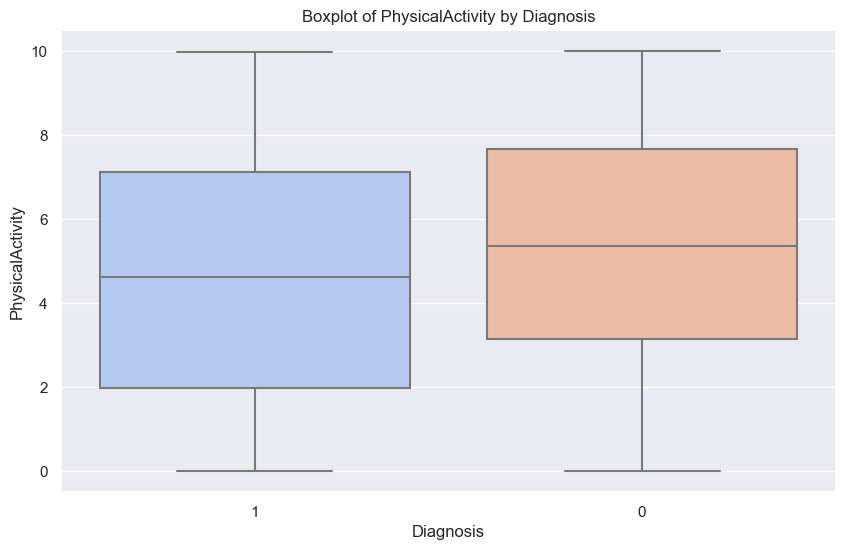

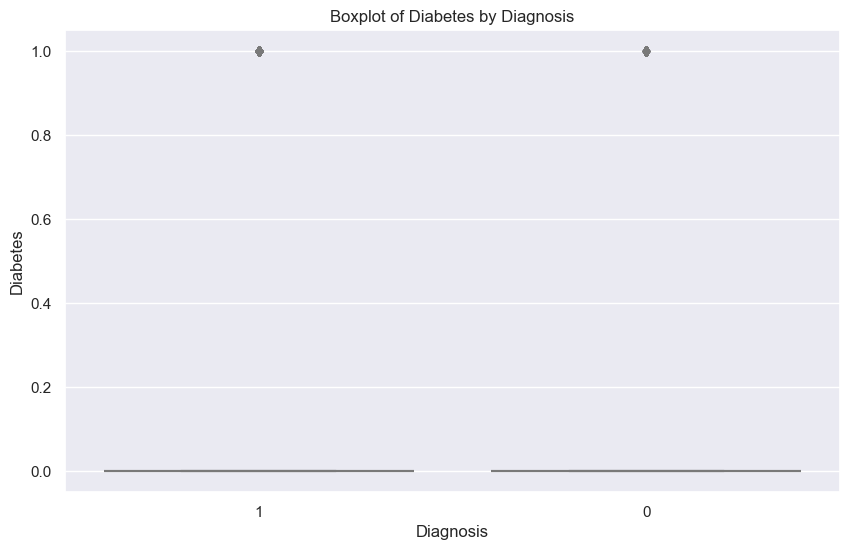

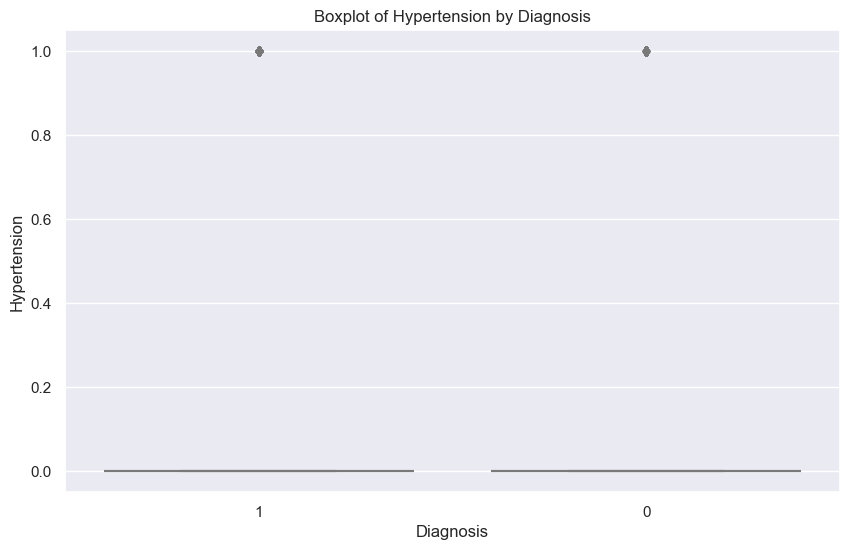

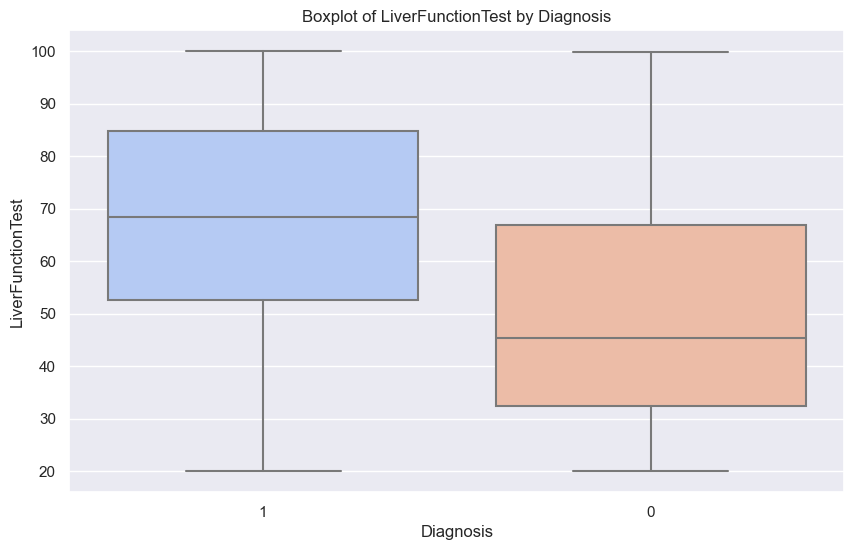

In [41]:
# box plots of variables by the diagnosis
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=col, data=data, palette='coolwarm')
    plt.title(f'Boxplot of {col} by {target}')
    plt.show()

In [70]:
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# linear regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [72]:
# Results of Logistic Regression
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_lr, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_lr, average='weighted'))

Logistic Regression:
Accuracy: 0.8117647058823529
Precision: 0.8127058823529412
Recall: 0.8117647058823529
F1 Score: 0.8112138500885304


In [73]:
# Results of Random Forest Model
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_rf, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest:
Accuracy: 0.8970588235294118
Precision: 0.8990405185581735
Recall: 0.8970588235294118
F1 Score: 0.8967206467979187


In [74]:
print('K-Neighbors:')
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_knn, average='weighted'))

K-Neighbors:
Accuracy: 0.8441176470588235
Precision: 0.8496066009352307
Recall: 0.8441176470588235
F1 Score: 0.8428919484588338
